In [ ]:
if (!require("openxlsx")) install.packages("openxlsx")
if (!require("plyr")) install.packages("plyr")
if (!require("reshape2")) install.packages("reshape2")
if (!require("randomForest")) install.packages("randomForest")

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




In [ ]:
#  Rename columns
correct_column_names <- c(
  "Year", "Sex", "code", "cause",
  "<1", "01-04", "05-09", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39",
  "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84",
  "85-89", "90+", "All ages", "Region"
)

library(openxlsx)
library(plyr)

dataExcelSheet <- loadWorkbook('deathsbyindividualcause.xlsx')

## Load excel ----
df1 <- readWorkbook(dataExcelSheet,sheet = "Table 1")
head(df1)
df1 <- df1[-c(1:3),]
head(df1)
df1["Region"] <- "United Kingdom"
colnames(df1) <- correct_column_names

df2 <- readWorkbook(dataExcelSheet,sheet = "Table 2")
head(df2)
df2 <- df2[-c(1:3),]
head(df2)

df2["Region"] <- "England"
colnames(df2) <- correct_column_names

df3 <- readWorkbook(dataExcelSheet,sheet = "Table 3")
head(df3)
df3 <- df3[-c(1:3),]
head(df3)

df3["Region"] <- "Wales"
colnames(df3) <- correct_column_names

df4 <- readWorkbook(dataExcelSheet,sheet = "Table 4")
head(df4)
df4 <- df4[-c(1:3),]
head(df4)
df4["Region"] <- "Scotland"
colnames(df4) <- correct_column_names


df5 <- readWorkbook(dataExcelSheet,sheet = "Table 5")
head(df5)
df5 <- df5[-c(1:3),]
head(df5)
df5["Region"] <- " Northern Ireland"
colnames(df5) <- correct_column_names

data <- rbind.fill(df1,df2,df3,df4,df5)
head(data)



,"Table.1:.Alcohol-specific.deaths.by.individual.cause,.sex.and.age.group,.United.Kingdom,.2001.to.2021.[note.2].[note.4]",X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,This worksheet contains one table. Some cells refer to notes which can be found on the 'Notes' worksheet.,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Source: Office for National Statistics,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Year [note 3],Sex,ICD-10 code,Individual cause of death description,<1,01-04,05-09,10-14,15-19,20-24,⋯,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+,All ages
4,2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2021,Persons,F10,Mental and behavioural disorders due to the use of alcohol,0,0,0,0,0,2,⋯,167,170,148,147,98,71,41,20,7,1167
6,2021,Persons,G31.2,Degeneration of nervous system due to alcohol,0,0,0,0,0,0,⋯,0,0,3,3,3,1,1,0,0,11


,"Table.1:.Alcohol-specific.deaths.by.individual.cause,.sex.and.age.group,.United.Kingdom,.2001.to.2021.[note.2].[note.4]",X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2021,Persons,F10,Mental and behavioural disorders due to the use of alcohol,0,0,0,0,0,2,⋯,167,170,148,147,98,71,41,20,7,1167
6,2021,Persons,G31.2,Degeneration of nervous system due to alcohol,0,0,0,0,0,0,⋯,0,0,3,3,3,1,1,0,0,11
7,2021,Persons,G62.1,Alcoholic polyneuropathy,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1
8,2021,Persons,G72.1,Alcoholic myopathy,0,0,0,0,0,0,⋯,0,1,0,1,0,0,0,0,0,2
9,2021,Persons,I42.6,Alcoholic cardiomyopathy,0,0,0,0,0,0,⋯,26,25,27,11,11,4,5,1,0,149


,"Table.2:.Alcohol-specific.deaths.by.individual.cause,.sex.and.age.group,.England,.2001.to.2021.[note.2].[note.3].[note.5]",X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,This worksheet contains one table. Some cells refer to notes which can be found on the 'Notes' worksheet.,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Source: Office for National Statistics,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Year [note 3],Sex,ICD-10 code,Individual cause of death description,<1,01-04,05-09,10-14,15-19,20-24,⋯,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+,All ages
4,2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2021,Persons,F10,Mental and behavioural disorders due to the use of alcohol,0,0,0,0,0,2,⋯,102,96,74,77,63,47,30,10,4,714
6,2021,Persons,G31.2,Degeneration of nervous system due to alcohol,0,0,0,0,0,0,⋯,0,0,2,3,2,1,0,0,0,8


,"Table.2:.Alcohol-specific.deaths.by.individual.cause,.sex.and.age.group,.England,.2001.to.2021.[note.2].[note.3].[note.5]",X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2021,Persons,F10,Mental and behavioural disorders due to the use of alcohol,0,0,0,0,0,2,⋯,102,96,74,77,63,47,30,10,4,714
6,2021,Persons,G31.2,Degeneration of nervous system due to alcohol,0,0,0,0,0,0,⋯,0,0,2,3,2,1,0,0,0,8
7,2021,Persons,G62.1,Alcoholic polyneuropathy,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,2021,Persons,G72.1,Alcoholic myopathy,0,0,0,0,0,0,⋯,0,1,0,1,0,0,0,0,0,2
9,2021,Persons,I42.6,Alcoholic cardiomyopathy,0,0,0,0,0,0,⋯,22,21,22,9,8,4,5,1,0,128


,"Table.3:.Alcohol-specific.deaths.by.individual.cause,.sex.and.age.group,.Wales,.2001.to.2021.[note.2].[note.5]",X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,This worksheet contains one table. Some cells refer to notes which can be found on the 'Notes' worksheet.,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Source: Office for National Statistics,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Year [note 3],Sex,ICD-10 code,Individual cause of death description,<1,01-04,05-09,10-14,15-19,20-24,⋯,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+,All ages
4,2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2021,Persons,F10,Mental and behavioural disorders due to the use of alcohol,0,0,0,0,0,0,⋯,3,7,5,9,1,3,0,0,0,36
6,2021,Persons,G31.2,Degeneration of nervous system due to alcohol,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,1


,"Table.3:.Alcohol-specific.deaths.by.individual.cause,.sex.and.age.group,.Wales,.2001.to.2021.[note.2].[note.5]",X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2021,Persons,F10,Mental and behavioural disorders due to the use of alcohol,0,0,0,0,0,0,⋯,3,7,5,9,1,3,0,0,0,36
6,2021,Persons,G31.2,Degeneration of nervous system due to alcohol,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,1
7,2021,Persons,G62.1,Alcoholic polyneuropathy,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,2021,Persons,G72.1,Alcoholic myopathy,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,2021,Persons,I42.6,Alcoholic cardiomyopathy,0,0,0,0,0,0,⋯,0,1,1,2,0,0,0,0,0,6


,"Table.4:.Alcohol-specific.deaths.by.individual.cause,.sex.and.age.group,.Scotland,.2001.to.2021.[note.2].[note.5]",X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,This worksheet contains one table. Some cells refer to notes which can be found on the 'Notes' worksheet.,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Source: Office for National Statistics,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Year [note 3],Sex,ICD-10 code,Individual cause of death description,<1,01-04,05-09,10-14,15-19,20-24,⋯,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+,All ages
4,2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2021,Persons,F10,Mental and behavioural disorders due to the use of alcohol,0,0,0,0,0,0,⋯,51,52,59,53,32,18,7,9,3,348
6,2021,Persons,G31.2,Degeneration of nervous system due to alcohol,0,0,0,0,0,0,⋯,0,0,0,0,1,0,1,0,0,2


,"Table.4:.Alcohol-specific.deaths.by.individual.cause,.sex.and.age.group,.Scotland,.2001.to.2021.[note.2].[note.5]",X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2021,Persons,F10,Mental and behavioural disorders due to the use of alcohol,0,0,0,0,0,0,⋯,51,52,59,53,32,18,7,9,3,348
6,2021,Persons,G31.2,Degeneration of nervous system due to alcohol,0,0,0,0,0,0,⋯,0,0,0,0,1,0,1,0,0,2
7,2021,Persons,G62.1,Alcoholic polyneuropathy,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1
8,2021,Persons,G72.1,Alcoholic myopathy,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,2021,Persons,I42.6,Alcoholic cardiomyopathy,0,0,0,0,0,0,⋯,4,2,1,0,3,0,0,0,0,11


,"Table.5:.Alcohol-specific.deaths.by.individual.cause,.sex.and.age.group,.Northern.Ireland,.2001.to.2021.[note.2].[note.5]",X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,This worksheet contains one table. Some cells refer to notes which can be found on the 'Notes' worksheet.,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Source: Office for National Statistics,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Year [note 3],Sex,ICD-10 code,Individual cause of death description,<1,01-04,05-09,10-14,15-19,20-24,⋯,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+,All ages
4,2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2021,Persons,F10,Mental and behavioural disorders due to the use of alcohol,0,0,0,0,0,0,⋯,10,15,10,8,2,3,4,1,0,68
6,2021,Persons,G31.2,Degeneration of nervous system due to alcohol,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,"Table.5:.Alcohol-specific.deaths.by.individual.cause,.sex.and.age.group,.Northern.Ireland,.2001.to.2021.[note.2].[note.5]",X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2021,Persons,F10,Mental and behavioural disorders due to the use of alcohol,0,0,0,0,0,0,⋯,10,15,10,8,2,3,4,1,0,68
6,2021,Persons,G31.2,Degeneration of nervous system due to alcohol,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,2021,Persons,G62.1,Alcoholic polyneuropathy,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,2021,Persons,G72.1,Alcoholic myopathy,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,2021,Persons,I42.6,Alcoholic cardiomyopathy,0,0,0,0,0,0,⋯,0,1,3,0,0,0,0,0,0,4


,Year,Sex,code,cause,<1,01-04,05-09,10-14,15-19,20-24,⋯,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+,All ages,Region
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,United Kingdom
2,2021,Persons,F10,Mental and behavioural disorders due to the use of alcohol,0,0,0,0,0,2,⋯,170,148,147,98,71,41,20,7,1167,United Kingdom
3,2021,Persons,G31.2,Degeneration of nervous system due to alcohol,0,0,0,0,0,0,⋯,0,3,3,3,1,1,0,0,11,United Kingdom
4,2021,Persons,G62.1,Alcoholic polyneuropathy,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,1,United Kingdom
5,2021,Persons,G72.1,Alcoholic myopathy,0,0,0,0,0,0,⋯,1,0,1,0,0,0,0,0,2,United Kingdom
6,2021,Persons,I42.6,Alcoholic cardiomyopathy,0,0,0,0,0,0,⋯,25,27,11,11,4,5,1,0,149,United Kingdom


In [ ]:

## load supplementary data ----

correct_column_names <- c(
  "Area_Code"	,"Area_Name",	"Sex"	,"Year" ,
  "Death_Count",
  "Age_Rate",
  "Lower_Confidence_Interval",
  "Upper_Confidence_Interval"
)

dataExcelSheet <- loadWorkbook('alcoholspecificdeaths2021.xlsx')

# Load supplementary dataset
supplementary_data <- readWorkbook(dataExcelSheet,sheet = "Table 1")


# View the structure of the dataset
head(supplementary_data)
supplementary_data <- supplementary_data[-c(1:4),]
colnames(supplementary_data) <- correct_column_names
head(supplementary_data)

head(supplementary_data)

,"Table.1:.Alcohol-specific.age-standardised.death.rates,.for.English.regions.and.constituent.countries.of.the.United.Kingdom,.2001.to.2021.[note.2].[note.4].[note.6].[note.7].[note.8]",X2,X3,X4,X5,X6,X7,X8
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,This worksheet contains one table. Some cells refer to notes which can be found on the 'Notes' worksheet.,NA,NA,NA,NA,NA,NA,NA
2,Source: Office for National Statistics,NA,NA,NA,NA,NA,NA,NA
3,Area code,Area name,Sex,Year [note 3],Number of deaths,"Age-standardised rate per 100,000",Lower 95% confidence interval,Upper 95% confidence interval
4,E12000001,North East,Females,2001,96,7.8,6.3,9.5
5,E12000001,North East,Males,2001,165,14.3,12.1,16.5
6,E12000001,North East,Persons,2001,261,10.9,9.6,12.2


,Area_Code,Area_Name,Sex,Year,Death_Count,Age_Rate,Lower_Confidence_Interval,Upper_Confidence_Interval
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5,E12000001,North East,Males,2001,165,14.3,12.1,16.5
6,E12000001,North East,Persons,2001,261,10.9,9.6,12.2
7,E12000001,North East,Females,2002,76,6.1,4.8,7.7
8,E12000001,North East,Males,2002,185,15.8,13.5,18.100000000000001
9,E12000001,North East,Persons,2002,261,10.8,9.5,12.1
10,E12000001,North East,Females,2003,110,8.8000000000000007,7.2,10.5


,Area_Code,Area_Name,Sex,Year,Death_Count,Age_Rate,Lower_Confidence_Interval,Upper_Confidence_Interval
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5,E12000001,North East,Males,2001,165,14.3,12.1,16.5
6,E12000001,North East,Persons,2001,261,10.9,9.6,12.2
7,E12000001,North East,Females,2002,76,6.1,4.8,7.7
8,E12000001,North East,Males,2002,185,15.8,13.5,18.100000000000001
9,E12000001,North East,Persons,2002,261,10.8,9.5,12.1
10,E12000001,North East,Females,2003,110,8.8000000000000007,7.2,10.5


In [ ]:
str(data)
str(supplementary_data)

'data.frame':	4713 obs. of  26 variables:
 $ Year    : chr  "2021" "2021" "2021" "2021" ...
 $ Sex     : chr  "Persons" "Persons" "Persons" "Persons" ...
 $ code    : chr  "E24.4" "F10" "G31.2" "G62.1" ...
 $ cause   : chr  "Alcohol-induced pseudo-Cushing's syndrome" "Mental and behavioural disorders due to the use of alcohol" "Degeneration of nervous system due to alcohol" "Alcoholic polyneuropathy" ...
 $ <1      : chr  "0" "0" "0" "0" ...
 $ 01-04   : chr  "0" "0" "0" "0" ...
 $ 05-09   : chr  "0" "0" "0" "0" ...
 $ 10-14   : chr  "0" "0" "0" "0" ...
 $ 15-19   : chr  "0" "0" "0" "0" ...
 $ 20-24   : chr  "0" "2" "0" "0" ...
 $ 25-29   : chr  "0" "8" "0" "0" ...
 $ 30-34   : chr  "0" "23" "0" "0" ...
 $ 35-39   : chr  "0" "46" "0" "0" ...
 $ 40-44   : chr  "0" "89" "0" "0" ...
 $ 45-49   : chr  "0" "130" "0" "0" ...
 $ 50-54   : chr  "0" "167" "0" "0" ...
 $ 55-59   : chr  "0" "170" "0" "1" ...
 $ 60-64   : chr  "0" "148" "3" "0" ...
 $ 65-69   : chr  "0" "147" "3" "0" ...
 $ 70-74 

In [ ]:
# EDA ----
## clean data ----
# Assuming your data is loaded into a data frame called 'data'
# Convert numeric columns
numeric_columns <- c("Year","<1", "01-04", "05-09", "10-14", "15-19", "20-24", "25-29",
                     "30-34", "35-39", "40-44", "45-49", "50-54", "55-59",
                     "60-64", "65-69", "70-74", "75-79", "80-84", "85-89", "90+", "All ages")
data[numeric_columns] <- lapply(data[numeric_columns], as.numeric)

# Clean column names: Remove non-alphanumeric characters (including leading numbers)
colnames(data) <- make.names(colnames(data), unique = TRUE)

# Check the cleaned column names
colnames(data)

# Inspect column names
colnames(data)

# Convert columns that need to be factors (e.g., Sex, ICD-10 code, etc.)
data$Sex <- as.factor(data$Sex)
data$Region <- as.factor(data$Region)

library(tidyr)
data_long <- data %>%
  pivot_longer(cols = starts_with("X"),  # Start with columns that represent age groups
               names_to = "Age_Group",
               values_to = "Deaths")

head(data_long)
tail(data_long)


[1] "Year"     "Sex"      "code"     "cause"    "X.1"      "X01.04"  
 [7] "X05.09"   "X10.14"   "X15.19"   "X20.24"   "X25.29"   "X30.34"  
[13] "X35.39"   "X40.44"   "X45.49"   "X50.54"   "X55.59"   "X60.64"  
[19] "X65.69"   "X70.74"   "X75.79"   "X80.84"   "X85.89"   "X90."    
[25] "All.ages" "Region"

[1] "Year"     "Sex"      "code"     "cause"    "X.1"      "X01.04"  
 [7] "X05.09"   "X10.14"   "X15.19"   "X20.24"   "X25.29"   "X30.34"  
[13] "X35.39"   "X40.44"   "X45.49"   "X50.54"   "X55.59"   "X60.64"  
[19] "X65.69"   "X70.74"   "X75.79"   "X80.84"   "X85.89"   "X90."    
[25] "All.ages" "Region"

Year,Sex,code,cause,All.ages,Region,Age_Group,Deaths
<dbl>,<fct>,<chr>,<chr>,<dbl>,<fct>,<chr>,<dbl>
2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,United Kingdom,X.1,0
2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,United Kingdom,X01.04,0
2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,United Kingdom,X05.09,0
2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,United Kingdom,X10.14,0
2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,United Kingdom,X15.19,0
2021,Persons,E24.4,Alcohol-induced pseudo-Cushing's syndrome,0,United Kingdom,X20.24,0


Year,Sex,code,cause,All.ages,Region,Age_Group,Deaths
<dbl>,<fct>,<chr>,<chr>,<dbl>,<fct>,<chr>,<dbl>
2001,Females,Y15,"Poisoning by and exposure to alcohol, undetermined intent",0,Northern Ireland,X65.69,0
2001,Females,Y15,"Poisoning by and exposure to alcohol, undetermined intent",0,Northern Ireland,X70.74,0
2001,Females,Y15,"Poisoning by and exposure to alcohol, undetermined intent",0,Northern Ireland,X75.79,0
2001,Females,Y15,"Poisoning by and exposure to alcohol, undetermined intent",0,Northern Ireland,X80.84,0
2001,Females,Y15,"Poisoning by and exposure to alcohol, undetermined intent",0,Northern Ireland,X85.89,0
2001,Females,Y15,"Poisoning by and exposure to alcohol, undetermined intent",0,Northern Ireland,X90.,0


In [ ]:
library(dplyr)
library(plyr)

## Analysis ----
# Summary statistics
summary(data_long)

# Check for missing values
colSums(is.na(data_long))

detach(package:plyr)


# Filter out the "Persons" category
data_long <- data_long %>%
  filter(Sex %in% c("Males", "Females"))

supplementary_data <- supplementary_data %>%
  filter(Sex %in% c("Males", "Females"))

# Filter out the "United Kingdom" region
data_long <- data_long %>%
  filter(!Region %in% c("United Kingdom"))



total_deaths_summary <- data_long %>%
  group_by(Region, Age_Group, Sex) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE)) %>%
  arrange(desc(Total_Deaths))
print(total_deaths_summary)

avg_deaths_summary <- data_long %>%
  group_by(Region, Age_Group) %>%
  summarise(Avg_Deaths = mean(Deaths, na.rm = TRUE)) %>%
  arrange(desc(Avg_Deaths))
print(avg_deaths_summary)

yearly_deaths_region <- data_long %>%
  group_by(Year, Region) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE))
print(yearly_deaths_region)

yearly_deaths_region <- data_long %>%
  group_by(Year, Region) %>%
  mutate(Total_Deaths = sum(Deaths, na.rm = TRUE))
print(yearly_deaths_region)

yearly_deaths_age <- data_long %>%
  group_by(Year, Age_Group) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE))
print(yearly_deaths_age)

deaths_distribution <- data_long %>%
  group_by(Region, Age_Group) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE)) %>%
  pivot_wider(names_from = Age_Group, values_from = Total_Deaths)
print(deaths_distribution)

sex_proportion <- data_long %>%
  group_by(Sex) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE)) %>%
  mutate(Proportion = Total_Deaths / sum(Total_Deaths))
print(sex_proportion)

regional_sex_disparity <- data_long %>%
  group_by(Region, Sex) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE)) %>%
  arrange(Region, desc(Total_Deaths))
print(regional_sex_disparity)

# Summarize deaths by Age Group and Region
total_deaths_summary <- data_long %>%
  group_by(Age_Group, Region) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE),
            Mean_Deaths = mean(Deaths, na.rm = TRUE),
            Median_Deaths = median(Deaths, na.rm = TRUE),
            SD_Deaths = sd(Deaths, na.rm = TRUE),
            Min_Deaths = min(Deaths, na.rm = TRUE),
            Max_Deaths = max(Deaths, na.rm = TRUE)) %>%
  arrange(Region, Age_Group)

# Print the summary table
print(total_deaths_summary)

# Summarize deaths by Age Group and Region
total_deaths_summary <- data_long %>%
  group_by( Region) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE),
            Mean_Deaths = mean(Deaths, na.rm = TRUE),
            Median_Deaths = median(Deaths, na.rm = TRUE),
            SD_Deaths = sd(Deaths, na.rm = TRUE),
            Min_Deaths = min(Deaths, na.rm = TRUE),
            Max_Deaths = max(Deaths, na.rm = TRUE)) %>%
  arrange(Region)

# Print the summary table
print(total_deaths_summary)


library(dplyr)

# Convert relevant columns to appropriate data types
supplementary_data <- supplementary_data %>%
  mutate(
    Year = as.numeric(Year),
    Death_Count = as.numeric(Death_Count),
    Age_Rate = as.numeric(Age_Rate),
    Lower_Confidence_Interval = as.numeric(Lower_Confidence_Interval),
    Upper_Confidence_Interval = as.numeric(Upper_Confidence_Interval),
    Sex = as.factor(Sex)
  )


# Calculate the mean age-standardized rate for each area
regional_analysis <- supplementary_data %>%
  group_by(Area_Name) %>%
  summarize(
    mean_rate = mean(Age_Rate, na.rm = TRUE),
    total_deaths = sum(Death_Count, na.rm = TRUE)
  ) %>%
  arrange(desc(mean_rate))

# View the top 10 high-risk areas
head(regional_analysis, 10)

# Plot age-standardized rates with confidence intervals over time for a selected area
selected_area <- "England"  # Change this to any area you want to analyze

# Compare age-standardized rates between males and females
gender_analysis <- supplementary_data %>%
  group_by(Sex, Year) %>%
  summarize(mean_rate = mean(Age_Rate, na.rm = TRUE))

total_deaths_summary <- data_long %>%
  group_by(Region, Age_Group, Sex) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE)) %>%
  ungroup()
print(total_deaths_summary)


      Year           Sex            code              cause          
 Min.   :2001   Females:31420   Length:94260       Length:94260      
 1st Qu.:2006   Males  :31420   Class :character   Class :character  
 Median :2011   Persons:31420   Mode  :character   Mode  :character  
 Mean   :2011                                                        
 3rd Qu.:2016                                                        
 Max.   :2021                                                        
    All.ages                    Region       Age_Group        
 Min.   :   0.0    Northern Ireland:18780   Length:94260      
 1st Qu.:   0.0   England          :18900   Class :character  
 Median :   1.0   Scotland         :18900   Mode  :character  
 Mean   : 126.8   United Kingdom   :18780                     
 3rd Qu.:  12.0   Wales            :18900                     
 Max.   :7518.0                                               
     Deaths        
 Min.   :   0.000  
 1st Qu.:   0.000  
 Median :

Year       Sex      code     cause  All.ages    Region Age_Group    Deaths 
        0         0         0         0         0         0         0         0

`summarise()` has grouped output by 'Region', 'Age_Group'. You can override
using the `.groups` argument.


# A tibble: 160 × 4
# Groups:   Region, Age_Group [80]
   Region  Age_Group Sex     Total_Deaths
   <fct>   <chr>     <fct>          <dbl>
 1 England X50.54    Males          11816
 2 England X55.59    Males          11750
 3 England X60.64    Males          10133
 4 England X45.49    Males          10029
 5 England X65.69    Males           7885
 6 England X40.44    Males           7237
 7 England X50.54    Females         5853
 8 England X55.59    Females         5811
 9 England X45.49    Females         5266
10 England X60.64    Females         4923
# ℹ 150 more rows


`summarise()` has grouped output by 'Region'. You can override using the
`.groups` argument.


# A tibble: 80 × 3
# Groups:   Region [4]
   Region   Age_Group Avg_Deaths
   <fct>    <chr>          <dbl>
 1 England  X50.54         28.0 
 2 England  X55.59         27.9 
 3 England  X45.49         24.3 
 4 England  X60.64         23.9 
 5 England  X65.69         18.1 
 6 England  X40.44         17.2 
 7 England  X70.74         10.7 
 8 England  X35.39          9.82
 9 Scotland X55.59          6.46
10 Scotland X50.54          6.09
# ℹ 70 more rows


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


# A tibble: 84 × 3
# Groups:   Year [21]
    Year Region              Total_Deaths
   <dbl> <fct>                      <dbl>
 1  2001 " Northern Ireland"          178
 2  2001 "England"                   4003
 3  2001 "Scotland"                  1228
 4  2001 "Wales"                      277
 5  2002 " Northern Ireland"          194
 6  2002 "England"                   4115
 7  2002 "Scotland"                  1334
 8  2002 "Wales"                      262
 9  2003 " Northern Ireland"          175
10  2003 "England"                   4424
# ℹ 74 more rows
# A tibble: 50,320 × 9
# Groups:   Year, Region [84]
    Year Sex   code  cause         All.ages Region Age_Group Deaths Total_Deaths
   <dbl> <fct> <chr> <chr>            <dbl> <fct>  <chr>      <dbl>        <dbl>
 1  2021 Males E24.4 Alcohol-indu…        0 Engla… X.1            0         7558
 2  2021 Males E24.4 Alcohol-indu…        0 Engla… X01.04         0         7558
 3  2021 Males E24.4 Alcohol-indu…        0 Engla… X05.09    

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


# A tibble: 420 × 3
# Groups:   Year [21]
    Year Age_Group Total_Deaths
   <dbl> <chr>            <dbl>
 1  2001 X.1                  0
 2  2001 X01.04               0
 3  2001 X05.09               0
 4  2001 X10.14               1
 5  2001 X15.19              11
 6  2001 X20.24              16
 7  2001 X25.29              58
 8  2001 X30.34             188
 9  2001 X35.39             375
10  2001 X40.44             617
# ℹ 410 more rows


`summarise()` has grouped output by 'Region'. You can override using the
`.groups` argument.


# A tibble: 4 × 21
# Groups:   Region [4]
  Region      X.1 X01.04 X05.09 X10.14 X15.19 X20.24 X25.29 X30.34 X35.39 X40.44
  <fct>     <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
1 " Northe…     0      0      0      0      3      8     48    116    308    543
2 "England"     6      0      0      1     49    238   1024   2965   6186  10854
3 "Scotlan…     0      0      0      2     14     37    197    552   1188   2009
4 "Wales"       0      0      0      0      5     21     72    191    386    700
# ℹ 10 more variables: X45.49 <dbl>, X50.54 <dbl>, X55.59 <dbl>, X60.64 <dbl>,
#   X65.69 <dbl>, X70.74 <dbl>, X75.79 <dbl>, X80.84 <dbl>, X85.89 <dbl>,
#   X90. <dbl>
# A tibble: 2 × 3
  Sex     Total_Deaths Proportion
  <fct>          <dbl>      <dbl>
1 Females        48840      0.327
2 Males         100384      0.673


`summarise()` has grouped output by 'Region'. You can override using the
`.groups` argument.


# A tibble: 8 × 3
# Groups:   Region [4]
  Region              Sex     Total_Deaths
  <fct>               <fct>          <dbl>
1 " Northern Ireland" Males           3562
2 " Northern Ireland" Females         1699
3 "England"           Males          74488
4 "England"           Females        36717
5 "Scotland"          Males          17256
6 "Scotland"          Females         7759
7 "Wales"             Males           5078
8 "Wales"             Females         2665


`summarise()` has grouped output by 'Age_Group'. You can override using the
`.groups` argument.


# A tibble: 80 × 8
# Groups:   Age_Group [20]
   Age_Group Region  Total_Deaths Mean_Deaths Median_Deaths SD_Deaths Min_Deaths
   <chr>     <fct>          <dbl>       <dbl>         <dbl>     <dbl>      <dbl>
 1 X.1       " Nort…            0     0                   0    0               0
 2 X01.04    " Nort…            0     0                   0    0               0
 3 X05.09    " Nort…            0     0                   0    0               0
 4 X10.14    " Nort…            0     0                   0    0               0
 5 X15.19    " Nort…            3     0.00479             0    0.0691          0
 6 X20.24    " Nort…            8     0.0128              0    0.112           0
 7 X25.29    " Nort…           48     0.0767              0    0.326           0
 8 X30.34    " Nort…          116     0.185               0    0.689           0
 9 X35.39    " Nort…          308     0.492               0    1.46            0
10 X40.44    " Nort…          543     0.867               0    

Area_Name,mean_rate,total_deaths
<chr>,<dbl>,<dbl>
Scotland,23.66667,25015
Northern Ireland,15.40000,5261
North East,15.21707,7837
North West,15.08095,21153
West Midlands,13.09286,14322
Wales,12.47619,7743
United Kingdom,12.08333,149505
Yorkshire and the Humber,11.80000,610
Yorkshire and The Humber,11.72000,11591


`summarise()` has grouped output by 'Sex'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Region', 'Age_Group'. You can override
using the `.groups` argument.


# A tibble: 160 × 4
   Region              Age_Group Sex     Total_Deaths
   <fct>               <chr>     <fct>          <dbl>
 1 " Northern Ireland" X.1       Females            0
 2 " Northern Ireland" X.1       Males              0
 3 " Northern Ireland" X01.04    Females            0
 4 " Northern Ireland" X01.04    Males              0
 5 " Northern Ireland" X05.09    Females            0
 6 " Northern Ireland" X05.09    Males              0
 7 " Northern Ireland" X10.14    Females            0
 8 " Northern Ireland" X10.14    Males              0
 9 " Northern Ireland" X15.19    Females            0
10 " Northern Ireland" X15.19    Males              3
# ℹ 150 more rows


ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `fct_reorder()`:
! could not find function "fct_reorder"

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)

               Year   All.ages     Deaths
Year     1.00000000 0.02070075 0.01313189
All.ages 0.02070075 1.00000000 0.63436759
Deaths   0.01313189 0.63436759 1.00000000


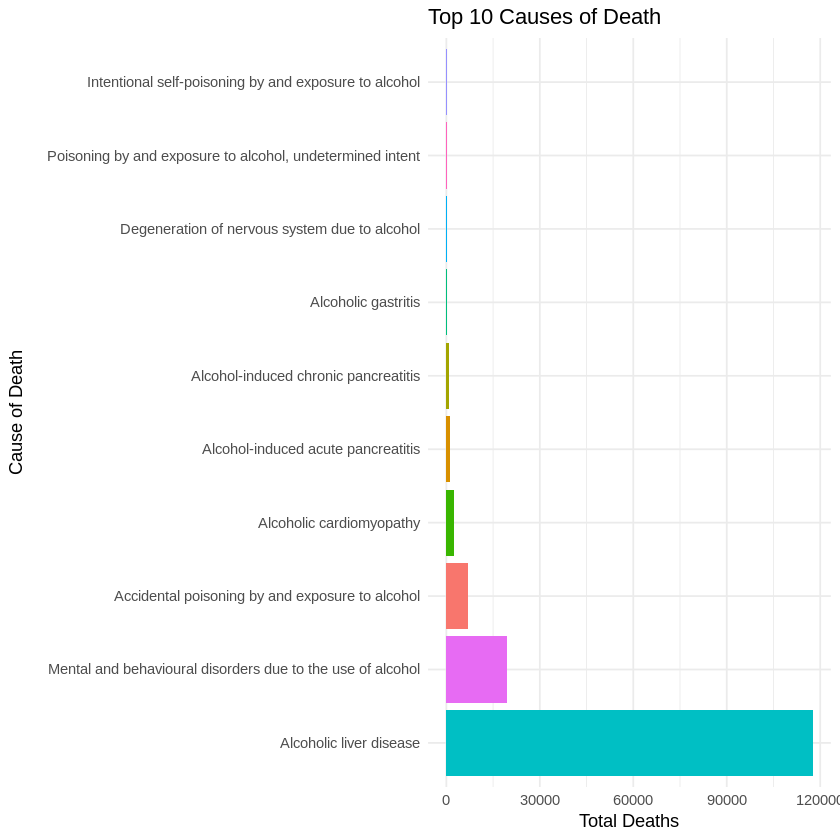

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


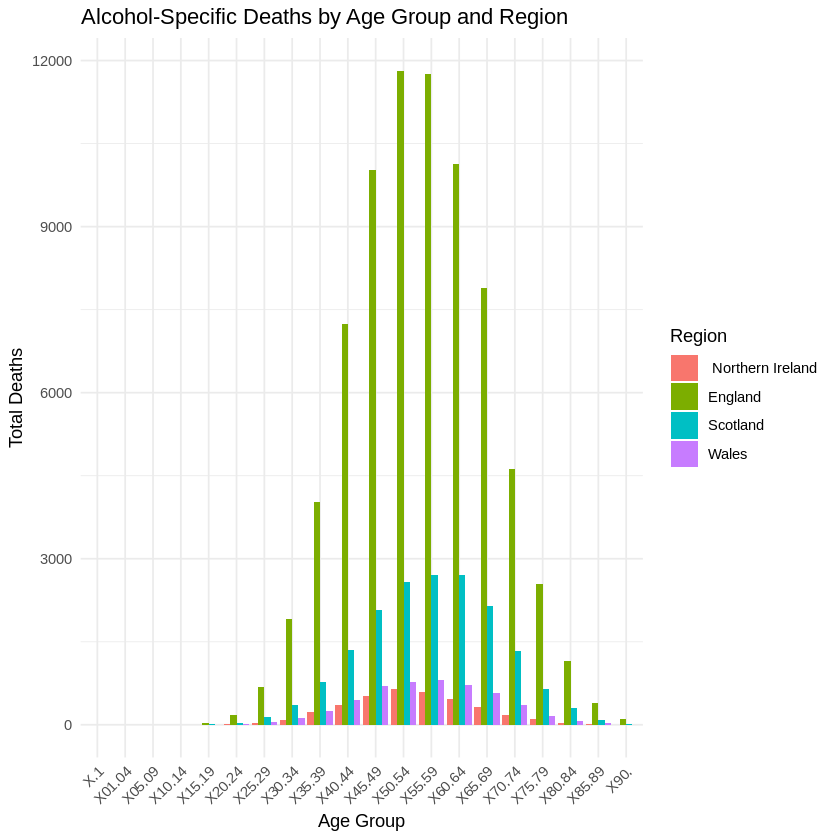

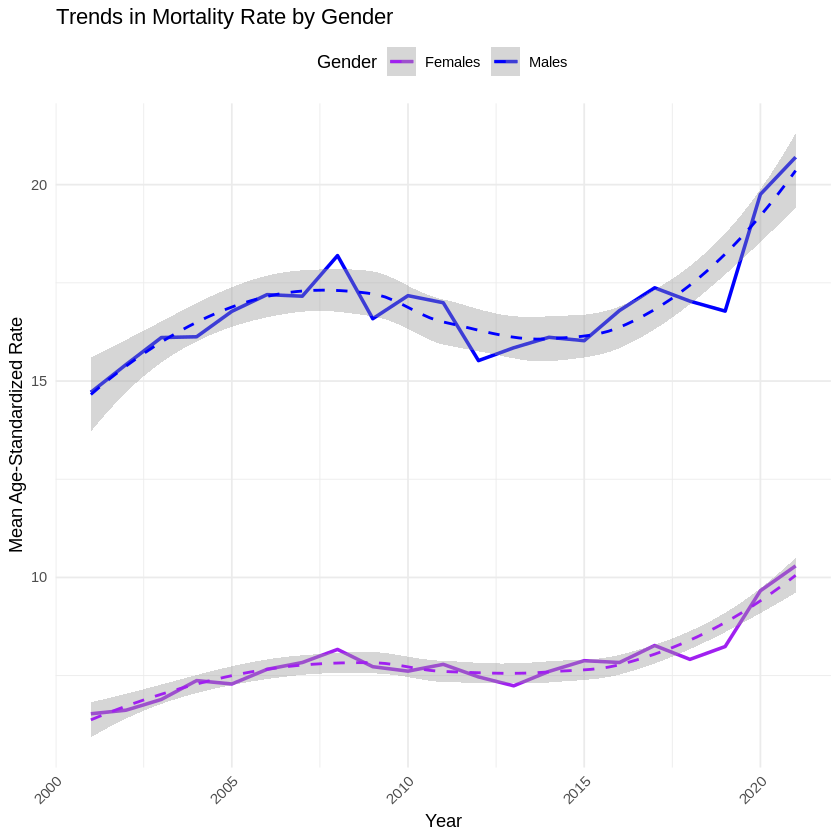

In [ ]:
# viz ----
# Plot top 10 regions by age-standardized rate

library(ggplot2)

top_regions <- regional_analysis %>%
  top_n(10, mean_rate)

ggplot(top_regions, aes(x = fct_reorder(Area_Name, mean_rate), y = mean_rate)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Top 10 Regions by Age-Standardized Mortality Rate",
       x = "Region",
       y = "Mean Age-Standardized Rate")

# Top 10 causes of death
top_causes <- data_long %>%
  group_by(cause) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE), .groups = "drop") %>%
  arrange(desc(Total_Deaths)) %>%
  slice(1:10)  # Select top 10 causes


ggplot(top_causes, aes(x = reorder(cause, -Total_Deaths), y = Total_Deaths, fill = cause)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Top 10 Causes of Death", x = "Cause of Death", y = "Total Deaths") +
  theme_minimal() +
  theme(legend.position = "none")


numeric_data <- data_long %>% select_if(is.numeric)
cor_matrix <- cor(numeric_data, use = "complete.obs")

print(cor_matrix)

ggplot(total_deaths_summary, aes(x = Age_Group, y = Total_Deaths, fill = Region)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Alcohol-Specific Deaths by Age Group and Region",
       x = "Age Group", y = "Total Deaths") +
  theme_minimal() +
theme(axis.text.x = element_text(angle = 45, hjust = 1))


# Ensure Year is numeric
gender_analysis$Year <- as.numeric(gender_analysis$Year)

# Filter relevant genders
gender_analysis_filtered <- gender_analysis %>%
  filter(Sex %in% c("Males", "Females"))

# Improved plot
ggplot(gender_analysis_filtered, aes(x = Year, y = mean_rate, color = Sex)) +
  geom_line(size = 1) +
  geom_smooth(se =  , linetype = "dashed", size = 0.8) +
  labs(title = "Trends in Mortality Rate by Gender",
       x = "Year",
       y = "Mean Age-Standardized Rate",
       color = "Gender") +
  scale_color_manual(values = c("Females" = "purple", "Males" = "blue", "Persons" = "green")) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "top"
  )

In [ ]:
# RQ 1 ----
library(dplyr)
library(ggplot2)
library(tidyr)
# Data Preprocessing: Aggregating by Year, Age Group, and Sex, and summing the Deaths
agg_data <- data_long %>%
  group_by(Year, Age_Group, Sex) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE)) %>%
  ungroup()

# Checking out the top causes of death (Alcohol-related)
top_causes <- data_long %>%
  group_by(cause) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE)) %>%
  arrange(desc(Total_Deaths))

unique(data_long$Region)
unique(data_long$Age_Group)
unique(data_long$Sex)

sum(is.na(data_long$Region))
sum(is.na(data_long$Age_Group))
sum(is.na(data_long$Sex))

str(data_long$Region)
str(data_long$Age_Group)
str(data_long$Sex)



`summarise()` has grouped output by 'Year', 'Age_Group'. You can override using
the `.groups` argument.


[1] England           Wales             Scotland           Northern Ireland
Levels:  Northern Ireland England Scotland United Kingdom Wales

[1] "X.1"    "X01.04" "X05.09" "X10.14" "X15.19" "X20.24" "X25.29" "X30.34"
 [9] "X35.39" "X40.44" "X45.49" "X50.54" "X55.59" "X60.64" "X65.69" "X70.74"
[17] "X75.79" "X80.84" "X85.89" "X90."

[1] Males   Females
Levels: Females Males Persons

[1] 0

[1] 0

[1] 0

 Factor w/ 5 levels " Northern Ireland",..: 2 2 2 2 2 2 2 2 2 2 ...
 chr [1:50320] "X.1" "X01.04" "X05.09" "X10.14" "X15.19" "X20.24" "X25.29" ...
 Factor w/ 3 levels "Females","Males",..: 2 2 2 2 2 2 2 2 2 2 ...


`summarise()` has grouped output by 'Year', 'Age_Group'. You can override using
the `.groups` argument.


                Deaths Sex_numeric       Year   All.ages
Deaths      1.00000000  0.04330624 0.01313189 0.63436759
Sex_numeric 0.04330624  1.00000000 0.00000000 0.06826678
Year        0.01313189  0.00000000 1.00000000 0.02070075
All.ages    0.63436759  0.06826678 0.02070075 1.00000000


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


# A tibble: 84 × 3
# Groups:   Year [21]
    Year Region              Total_Deaths
   <dbl> <fct>                      <dbl>
 1  2001 " Northern Ireland"          178
 2  2001 "England"                   4003
 3  2001 "Scotland"                  1228
 4  2001 "Wales"                      277
 5  2002 " Northern Ireland"          194
 6  2002 "England"                   4115
 7  2002 "Scotland"                  1334
 8  2002 "Wales"                      262
 9  2003 " Northern Ireland"          175
10  2003 "England"                   4424
# ℹ 74 more rows


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


# A tibble: 2 × 3
  Sex     Total_Deaths Proportion
  <fct>          <dbl>      <dbl>
1 Females        48840      0.327
2 Males         100384      0.673


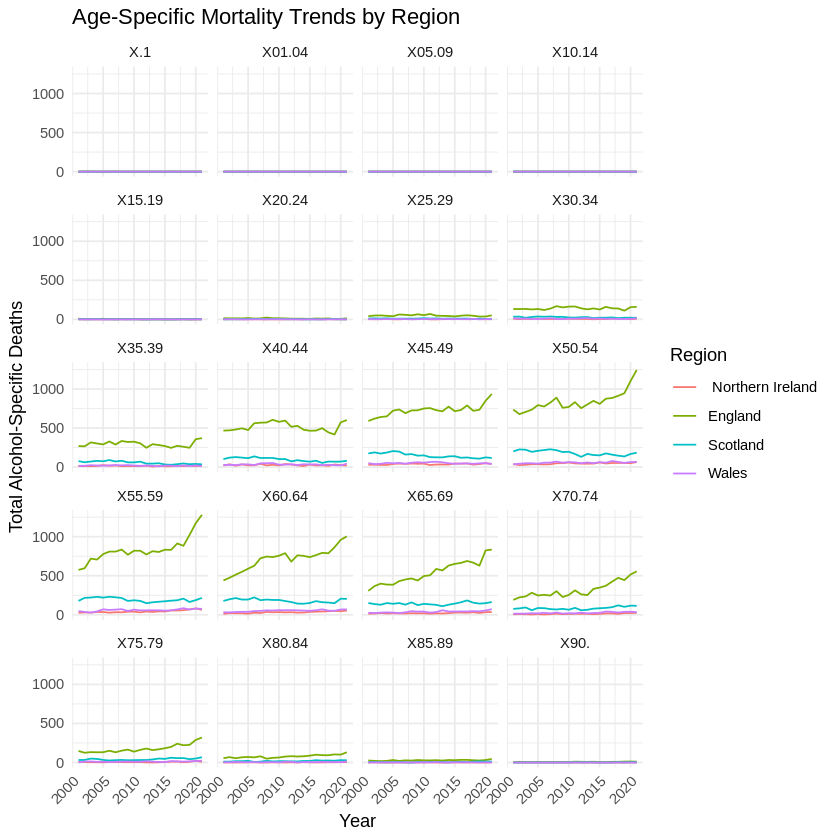

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


# A tibble: 84 × 3
    Year Region              Total_Deaths
   <dbl> <fct>                      <dbl>
 1  2001 " Northern Ireland"          178
 2  2001 "England"                   4003
 3  2001 "Scotland"                  1228
 4  2001 "Wales"                      277
 5  2002 " Northern Ireland"          194
 6  2002 "England"                   4115
 7  2002 "Scotland"                  1334
 8  2002 "Wales"                      262
 9  2003 " Northern Ireland"          175
10  2003 "England"                   4424
# ℹ 74 more rows


`summarise()` has grouped output by 'cause', 'Region'. You can override using
the `.groups` argument.


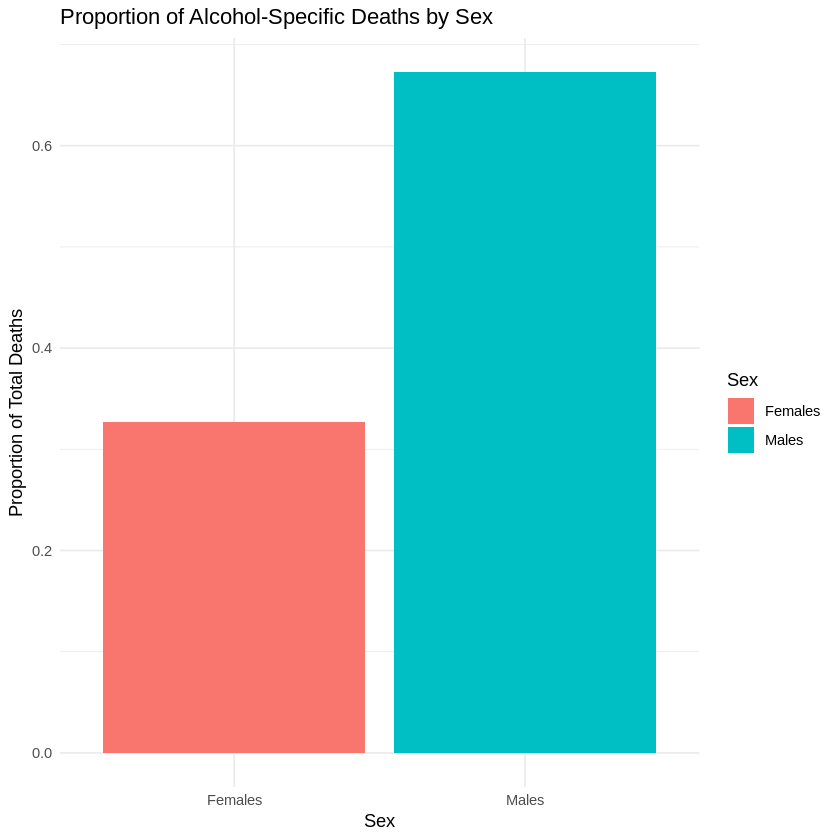

# A tibble: 10 × 2
   cause                                                      Total_Deaths
   <chr>                                                             <dbl>
 1 Alcoholic liver disease                                          117541
 2 Mental and behavioural disorders due to the use of alcohol        19542
 3 Accidental poisoning by and exposure to alcohol                    6979
 4 Alcoholic cardiomyopathy                                           2460
 5 Alcohol-induced acute pancreatitis                                 1116
 6 Alcohol-induced chronic pancreatitis                                790
 7 Alcoholic gastritis                                                 260
 8 Degeneration of nervous system due to alcohol                       256
 9 Poisoning by and exposure to alcohol, undetermined intent           137
10 Intentional self-poisoning by and exposure to alcohol                85


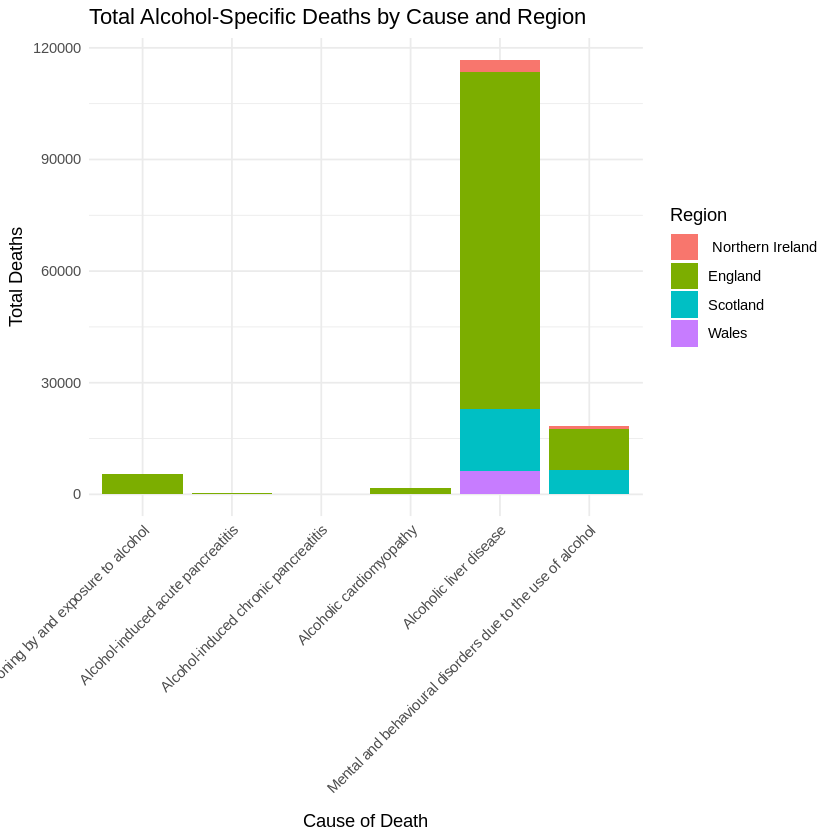

# A tibble: 4 × 3
  Region              cause                   Total_Deaths
  <fct>               <chr>                          <dbl>
1 " Northern Ireland" Alcoholic liver disease         3409
2 "England"           Alcoholic liver disease        90734
3 "Scotland"          Alcoholic liver disease        16933
4 "Wales"             Alcoholic liver disease         6465


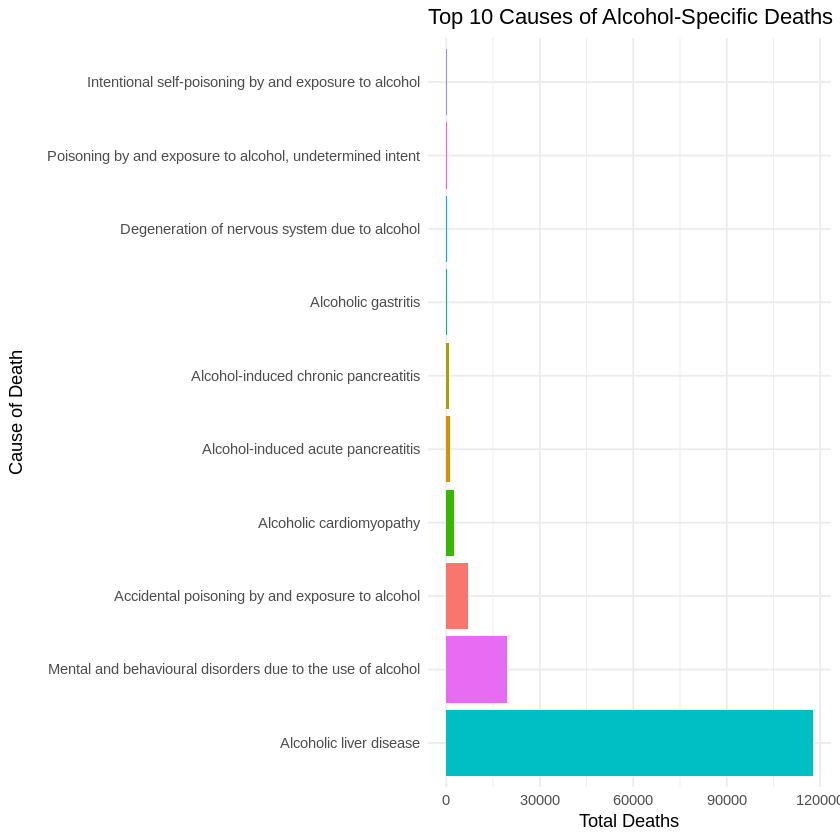

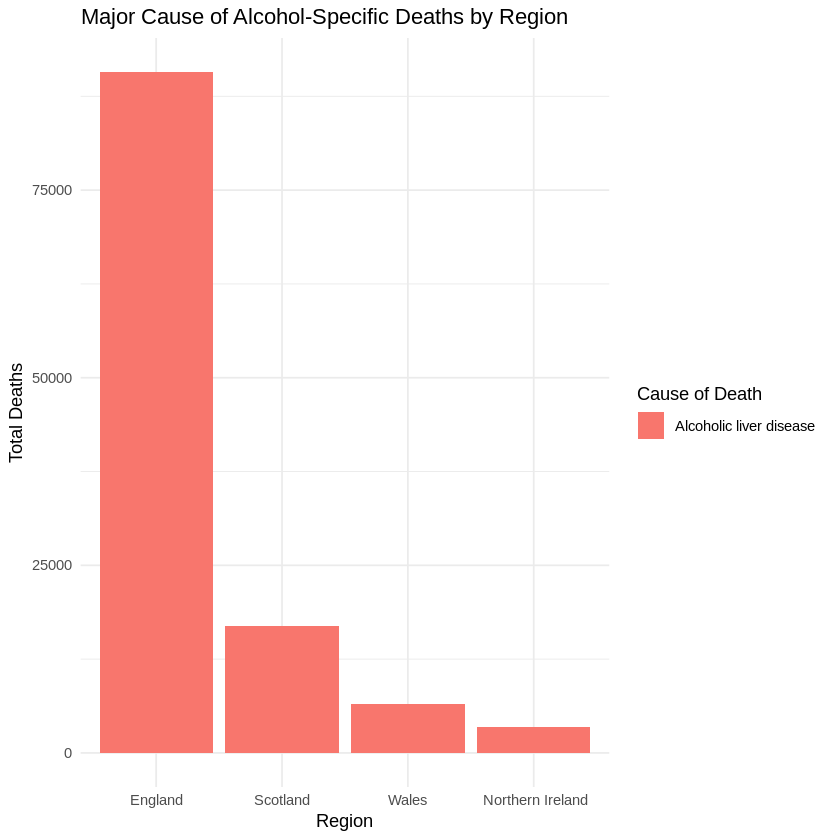

In [ ]:
library(dplyr)
library(ggplot2)

# Assuming 'data' is your pivoted dataframe
age_group_region_trends <- data_long %>%
  group_by(Year, Age_Group, Region) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE)) %>%
  ungroup()

ggplot(age_group_region_trends, aes(x = Year, y = Total_Deaths, color = Region)) +
  geom_line() +
  facet_wrap(~ Age_Group, scales = "fixed", ncol = 4) +
  scale_x_continuous(breaks = seq(2000, 2020, by = 5)) +
  labs(title = "Age-Specific Mortality Trends by Region",
       x = "Year",
       y = "Total Alcohol-Specific Deaths",
       color = "Region") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


# Convert Sex to numeric values for correlation
data_long$Sex_numeric <- as.numeric(data_long$Sex)

# Calculate correlation matrix
cor_data <- data_long %>%
  select(Deaths, Sex_numeric, Year,All.ages) %>%
  cor(method = "pearson")

print(cor_data)

# Summarize total deaths by year and region
yearly_deaths_summary <- data_long %>%
  group_by(Year, Region) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE))

# Print the yearly summary table
print(yearly_deaths_summary)

# Summarize deaths by Year and Age Group
age_group_contribution <- data_long %>%
  group_by(Year, Age_Group) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE)) %>%
  ungroup()

# Summarize the proportion of alcohol-specific deaths by sex
sex_proportions <- data_long %>%
  group_by(Sex) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE)) %>%
  mutate(Proportion = Total_Deaths / sum(Total_Deaths))

# Print the proportions table
print(sex_proportions)

# Plot: Proportion of alcohol-specific deaths by sex
ggplot(sex_proportions, aes(x = Sex, y = Proportion, fill = Sex)) +
  geom_bar(stat = "identity") +
  labs(title = "Proportion of Alcohol-Specific Deaths by Sex",
       x = "Sex",
       y = "Proportion of Total Deaths") +
  theme_minimal()


# Summarizing total deaths by Region and Year
heatmap_data <- data_long %>%
  group_by(Year, Region) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE)) %>%
  ungroup()

print(heatmap_data)


# Summarizing deaths by Cause, Region, and Age Group
cause_analysis <- data_long %>%
  group_by(cause, Region, Age_Group) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE)) %>%
  filter(Total_Deaths > 100) %>%
  ungroup()

# Visualize the total deaths by cause and region
ggplot(cause_analysis, aes(x = cause, y = Total_Deaths, fill = Region)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Alcohol-Specific Deaths by Cause and Region",
       x = "Cause of Death",
       y = "Total Deaths",
       fill = "Region") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))




# Summarize total deaths by cause
top_causes <- data_long %>%
  group_by(cause) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE), .groups = "drop") %>%
  arrange(desc(Total_Deaths)) %>%
  slice(1:10)  # Select the top 10 causes

print(top_causes )
# Plot the top 10 causes
ggplot(top_causes, aes(x = reorder(cause, -Total_Deaths), y = Total_Deaths, fill = cause)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Top 10 Causes of Alcohol-Specific Deaths",
       x = "Cause of Death",
       y = "Total Deaths") +
  theme_minimal() +
  theme(legend.position = "none")



# Identify the major cause in each region
major_cause_by_region <- data_long %>%
  group_by(Region, cause) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE), .groups = "drop") %>%
  arrange(Region, desc(Total_Deaths)) %>%
  slice_max(order_by = Total_Deaths, n = 1, by = "Region")  # Top cause per region

print(major_cause_by_region)

# Plot the major cause in each region
ggplot(major_cause_by_region, aes(x = reorder(Region, -Total_Deaths), y = Total_Deaths, fill = cause)) +
  geom_bar(stat = "identity") +
  labs(title = "Major Cause of Alcohol-Specific Deaths by Region",
       x = "Region",
       y = "Total Deaths",
       fill = "Cause of Death") +
  theme_minimal()







------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




Area_Code,Area_Name,Sex,Year,Death_Count,Age_Rate,Lower_Confidence_Interval,Upper_Confidence_Interval
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E12000001,North East,Males,2001,165,14.3,12.1,16.5
E12000001,North East,Females,2002,76,6.1,4.8,7.7
E12000001,North East,Males,2002,185,15.8,13.5,18.1
E12000001,North East,Females,2003,110,8.8,7.2,10.5
E12000001,North East,Males,2003,187,16.0,13.7,18.3
E12000001,North East,Females,2004,112,9.0,7.3,10.6
E12000001,North East,Males,2004,221,18.8,16.3,21.3
E12000001,North East,Females,2005,102,8.1,6.6,9.7
E12000001,North East,Males,2005,210,17.5,15.1,19.8


'data.frame':	629 obs. of  8 variables:
 $ Area_Code                : chr  "E12000001" "E12000001" "E12000001" "E12000001" ...
 $ Area_Name                : chr  "North East" "North East" "North East" "North East" ...
 $ Sex                      : Factor w/ 2 levels "Females","Males": 2 1 2 1 2 1 2 1 2 1 ...
 $ Year                     : num  2001 2002 2002 2003 2003 ...
 $ Death_Count              : num  165 76 185 110 187 112 221 102 210 105 ...
 $ Age_Rate                 : num  14.3 6.1 15.8 8.8 16 9 18.8 8.1 17.5 8.3 ...
 $ Lower_Confidence_Interval: num  12.1 4.8 13.5 7.2 13.7 7.3 16.3 6.6 15.1 6.7 ...
 $ Upper_Confidence_Interval: num  16.5 7.7 18.1 10.5 18.3 10.6 21.3 9.7 19.8 9.9 ...
Rows: 50,320
Columns: 9
$ Year        <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021…
$ Sex         <fct> Males, Males, Males, Males, Males, Males, Males, Males, Ma…
$ code        <chr> "E24.4", "E24.4", "E24.4", "E24.4", "E24.4", "E24.4", "E24…
$ cause       <chr> "Alcohol-induc

Warning message in inner_join(., supplementary_data, by = c("Year", "Sex")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 41 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


[1] "Numerical Summary:"
# A tibble: 1 × 8
  Total_Deaths Average_Deaths Median_Deaths Max_Deaths Min_Deaths SD_Deaths
         <dbl>          <dbl>         <dbl>      <dbl>      <dbl>     <dbl>
1      2236539           2.97             0        678          0      23.7
# ℹ 2 more variables: Avg_Age_Rate <dbl>, SD_Age_Rate <dbl>


Warning message:
“There were 13 warnings in `summarise()`.
The first warning was:
ℹ In argument: `Deaths_Rate_Correlation = cor(Deaths, Age_Rate, use =
  "complete.obs")`.
ℹ In group 1: `Region = Northern Ireland` and `Age_Group = "X.1"`.
Caused by warning in `cor()`:
! the standard deviation is zero
ℹ Run `dplyr::last_dplyr_warnings()` to see the 12 remaining warnings.”
`summarise()` has grouped output by 'Region'. You can override using the
`.groups` argument.


[1] "Grouped Summary by Region and Age_Group:"
# A tibble: 80 × 5
# Groups:   Region [4]
   Region   Age_Group Total_Deaths Avg_Age_Rate Deaths_Rate_Correlation
   <fct>    <chr>            <dbl>        <dbl>                   <dbl>
 1 England  X50.54          264783         12.3                  0.0803
 2 England  X55.59          263246         12.3                  0.0802
 3 England  X45.49          229216         12.3                  0.0744
 4 England  X60.64          225691         12.3                  0.0798
 5 England  X65.69          170563         12.3                  0.0870
 6 England  X40.44          162668         12.3                  0.0795
 7 England  X70.74          101268         12.3                  0.0863
 8 England  X35.39           92701         12.3                  0.0778
 9 Scotland X55.59           60952         12.3                  0.0825
10 Scotland X50.54           57526         12.3                  0.0818
# ℹ 70 more rows
[1] "Correlation Matrix:"
    

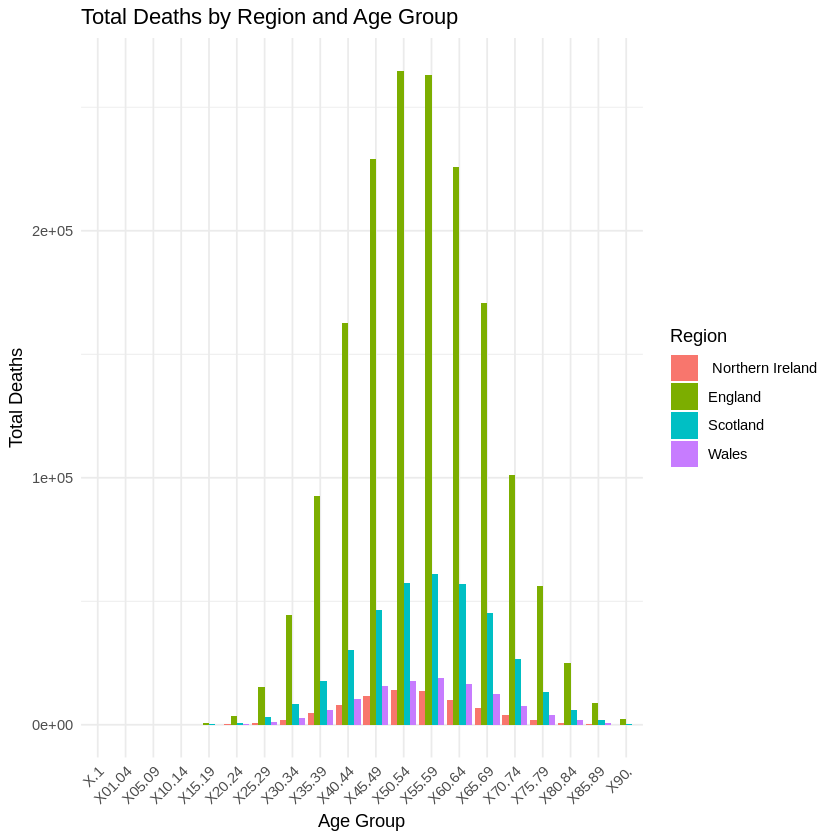

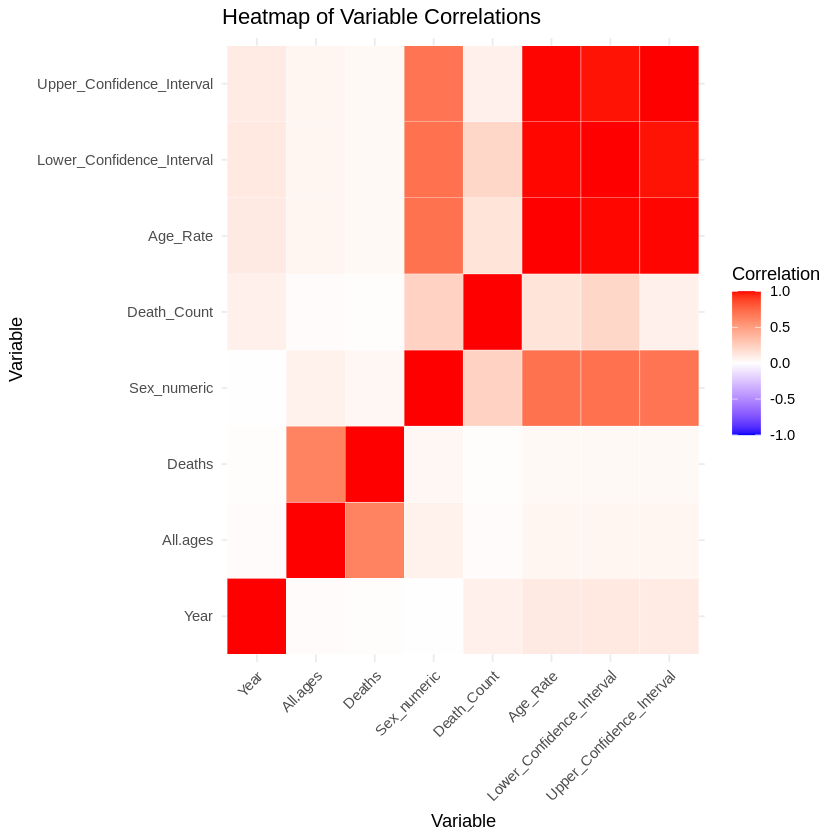

In [ ]:


# RQ 1 : attempt 2 ----


library(dplyr)
library(plyr)


library(dplyr)
detach(package:plyr)


View(supplementary_data)
str(supplementary_data)





# Load required libraries
library(dplyr)
library(tidyr)

main_data <- data_long
# Inspect the structure of both datasets
glimpse(main_data)
glimpse(supplementary_data)

# Check for missing values in both datasets
main_missing <- colSums(is.na(main_data))
supplementary_missing <- colSums(is.na(supplementary_data))

print("Missing Values in Main Dataset:")
print(main_missing)
print("Missing Values in Supplementary Dataset:")
print(supplementary_missing)

# Data type conversion (if not already converted)
main_data <- main_data %>%
  mutate(
    Year = as.numeric(Year),
    Deaths = as.numeric(Deaths),
    All.ages = as.numeric(All.ages),
    Sex = as.factor(Sex),
    Region = as.factor(Region)
  )

supplementary_data <- supplementary_data %>%
  mutate(
    Year = as.numeric(Year),
    Death_Count = as.numeric(Death_Count),
    Age_Rate = as.numeric(Age_Rate),
    Lower_Confidence_Interval = as.numeric(Lower_Confidence_Interval),
    Upper_Confidence_Interval = as.numeric(Upper_Confidence_Interval),
    Sex = as.factor(Sex)
  )

# Merge datasets on Year and Sex
merged_data <- main_data %>%
  inner_join(supplementary_data, by = c("Year", "Sex"))

# Summarize basic statistics for numerical variables in the merged dataset
numerical_summary <- merged_data %>%
  summarise(
    Total_Deaths = sum(Deaths, na.rm = TRUE),
    Average_Deaths = mean(Deaths, na.rm = TRUE),
    Median_Deaths = median(Deaths, na.rm = TRUE),
    Max_Deaths = max(Deaths, na.rm = TRUE),
    Min_Deaths = min(Deaths, na.rm = TRUE),
    SD_Deaths = sd(Deaths, na.rm = TRUE),
    Avg_Age_Rate = mean(Age_Rate, na.rm = TRUE),
    SD_Age_Rate = sd(Age_Rate, na.rm = TRUE)
  )
print("Numerical Summary:")
print(numerical_summary)

# Grouped summaries by Region and Age_Group
grouped_summary <- merged_data %>%
  group_by(Region, Age_Group) %>%
  summarise(
    Total_Deaths = sum(Deaths, na.rm = TRUE),
    Avg_Age_Rate = mean(Age_Rate, na.rm = TRUE),
    Deaths_Rate_Correlation = cor(Deaths, Age_Rate, use = "complete.obs")
  ) %>%
  arrange(desc(Total_Deaths))

print("Grouped Summary by Region and Age_Group:")
print(grouped_summary)

# Correlation Matrix for the merged dataset
numerical_cols <- merged_data %>%
  select_if(is.numeric)

correlation_matrix <- cor(numerical_cols, use = "complete.obs")
print("Correlation Matrix:")
print(correlation_matrix)

# Identify potential outliers using interquartile range (IQR) for Deaths
iqr_deaths <- IQR(merged_data$Deaths, na.rm = TRUE)
q1 <- quantile(merged_data$Deaths, 0.25, na.rm = TRUE)
q3 <- quantile(merged_data$Deaths, 0.75, na.rm = TRUE)

outlier_threshold_low <- q1 - 1.5 * iqr_deaths
outlier_threshold_high <- q3 + 1.5 * iqr_deaths

outliers <- merged_data %>%
  filter(Deaths < outlier_threshold_low | Deaths > outlier_threshold_high)

print("Outliers in Deaths:")
print(outliers)

# Analyze trends across time for Death_Count and Age_Rate
trend_analysis <- merged_data %>%
  group_by(Year) %>%
  summarise(
    Avg_Deaths = mean(Deaths, na.rm = TRUE),
    Avg_Age_Rate = mean(Age_Rate, na.rm = TRUE),
    Total_Deaths = sum(Deaths, na.rm = TRUE)
  )
print("Trend Analysis by Year:")
print(trend_analysis)

# Check for distribution across regions
region_distribution <- merged_data %>%
  group_by(Region) %>%
  summarise(Total_Deaths = sum(Deaths, na.rm = TRUE))

print("Regional Death Distribution:")
print(region_distribution)

library(ggplot2)

# Bar plot for total deaths by region and age group
ggplot(grouped_summary, aes(x = Age_Group, y = Total_Deaths, fill = Region)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Total Deaths by Region and Age Group",
    x = "Age Group",
    y = "Total Deaths",
    fill = "Region"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



library(reshape2)

# Convert correlation matrix to a long format for ggplot2
correlation_long <- melt(as.matrix(correlation_matrix))

# Heatmap for correlation matrix
ggplot(correlation_long, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(
    low = "blue", high = "red", mid = "white",
    midpoint = 0, limit = c(-1, 1),
    name = "Correlation"
  ) +
  labs(
    title = "Heatmap of Variable Correlations",
    x = "Variable",
    y = "Variable"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



Linear Regression RMSE: 19.56181 
Linear Regression R-squared: 0.3946074 


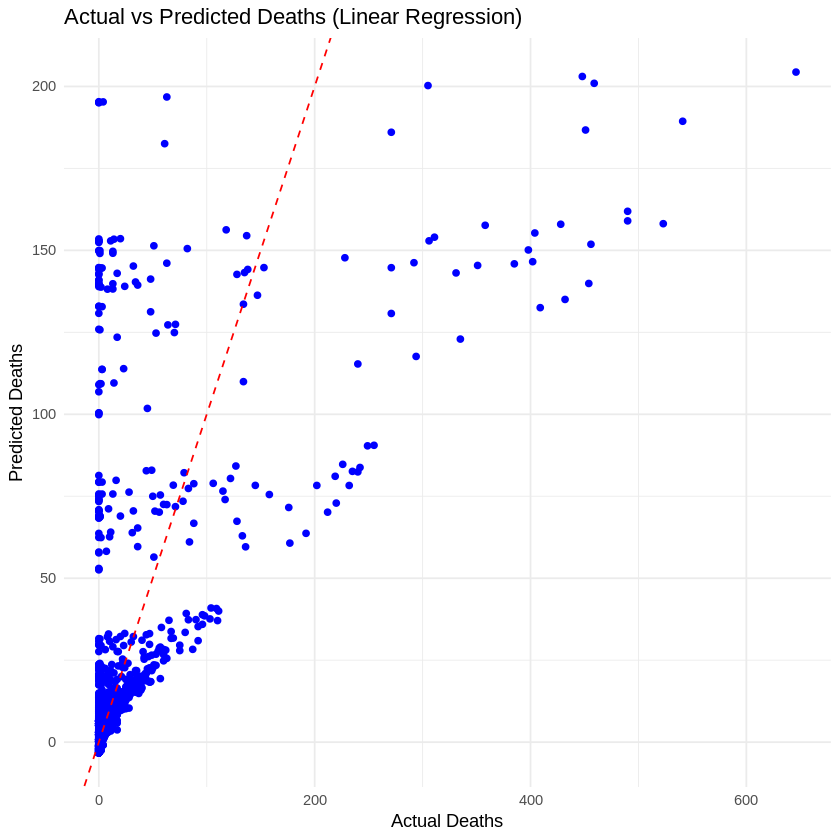


Call:
 randomForest(formula = Deaths ~ ., data = train_data[, !names(train_data) %in%      c("Year", "cause", "code")], importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 289.9725
                    % Var explained: 46.43


,%IncMSE,IncNodePurity
Sex,5.851029,81981.49
All.ages,23.899410,5175611.13
Region,9.693674,217711.65
Age_Group,14.825178,1103927.32
Sex_numeric,5.408455,91555.58


Random Forest RMSE: 18.5682 
Random Forest R-squared: 0.4545456 


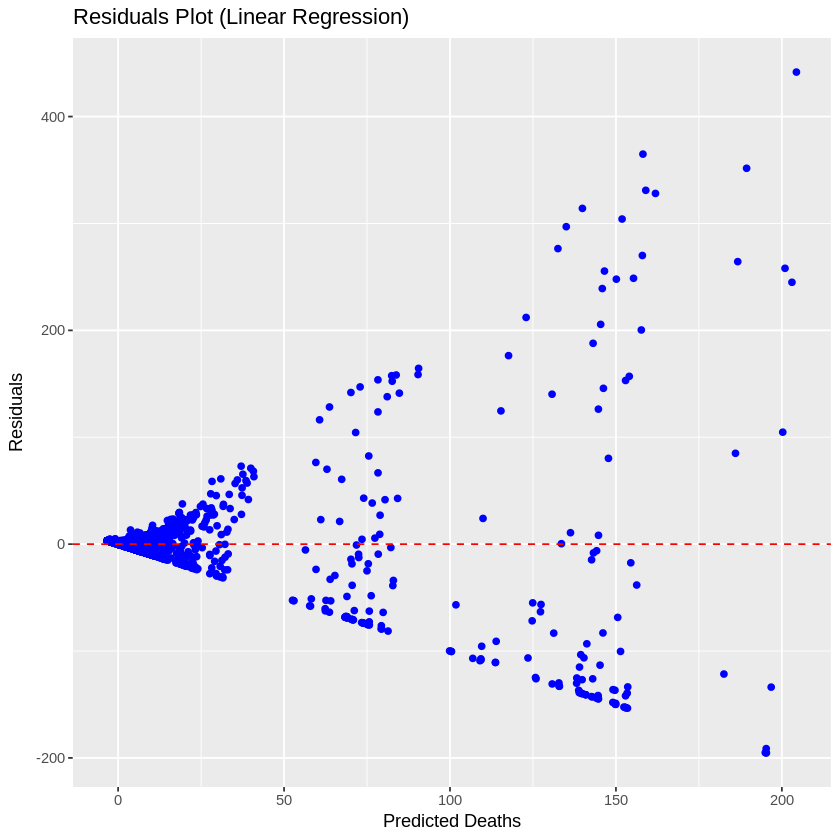

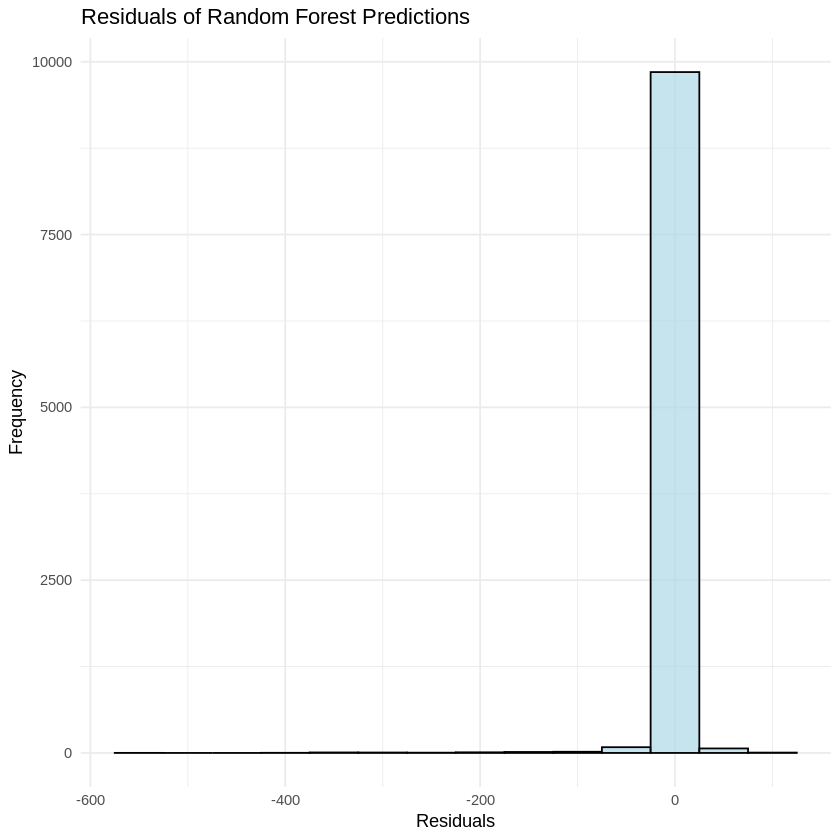

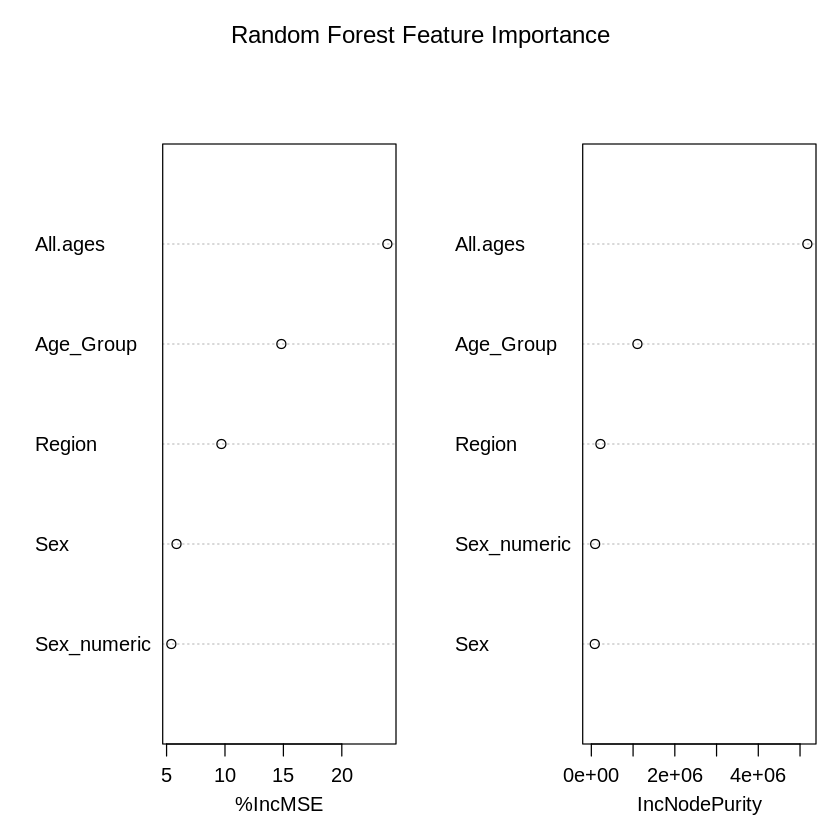

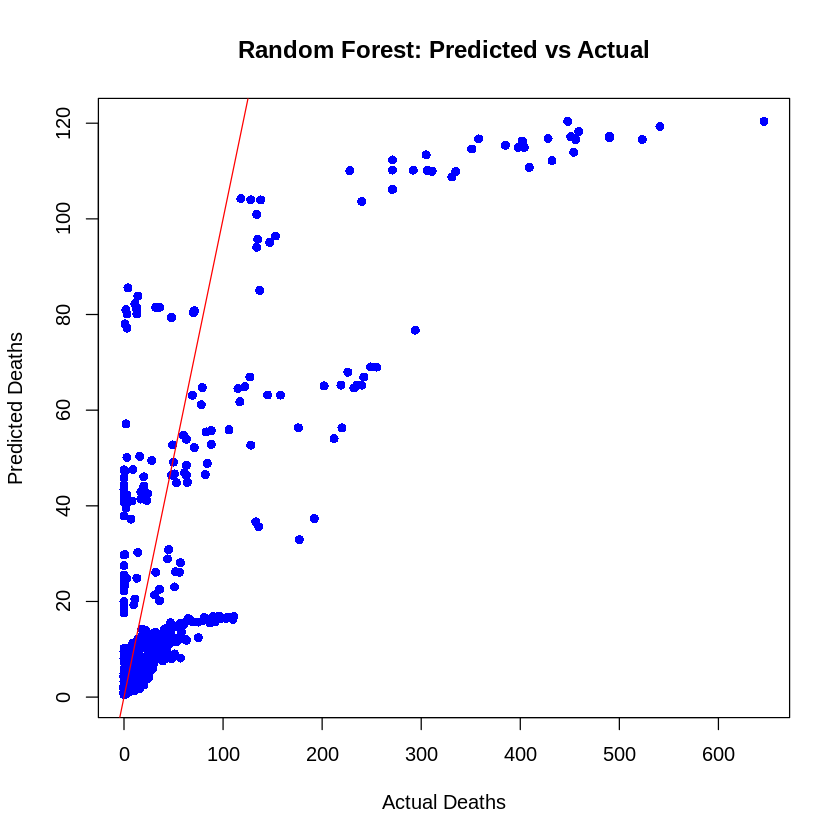

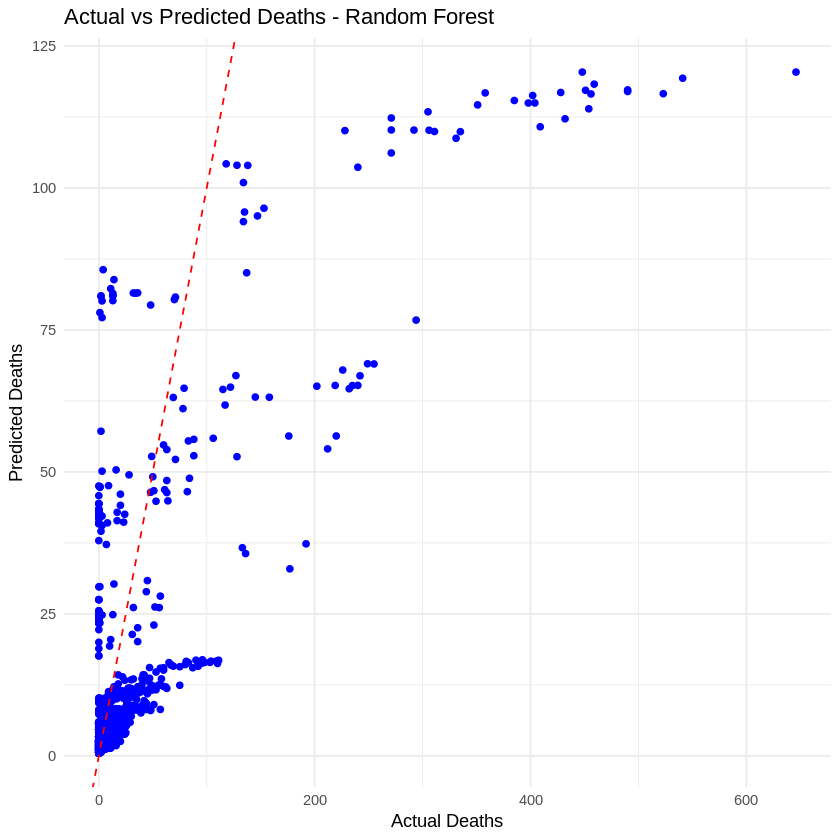

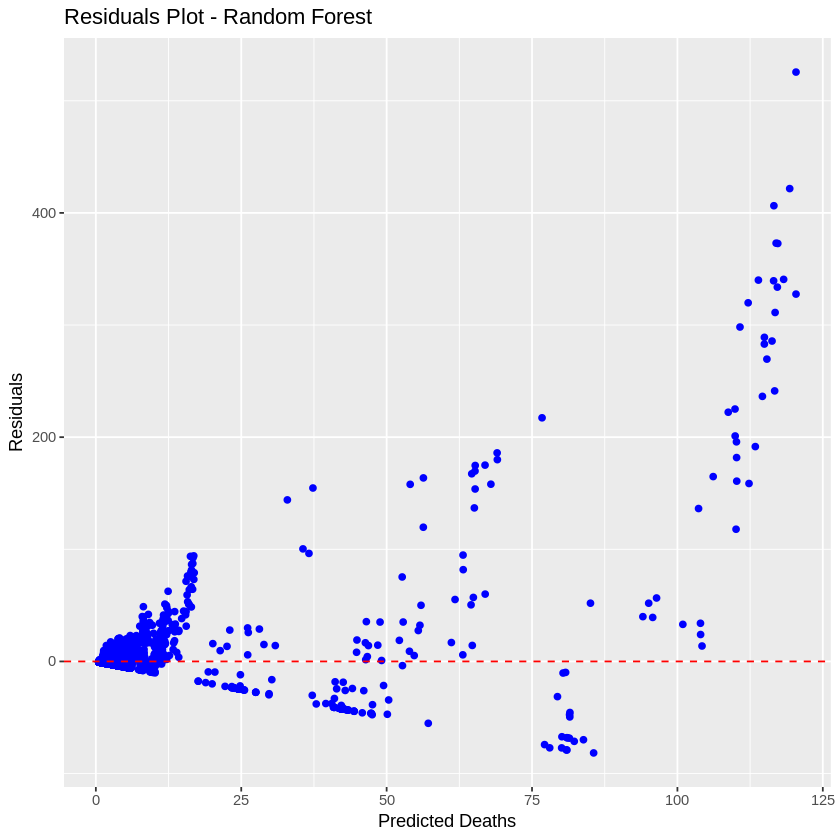

In [ ]:
# Predictive modeling ----
library(randomForest)
## split the dataset ----
set.seed(123)

# Split data into training (80%) and testing (20%) sets
train_index <- sample(1:nrow(data_long), 0.8 * nrow(data_long))
train_data <- data_long[train_index, ]
test_data <- data_long[-train_index, ]

## lrm ----
# Linear Regression Model
lm_model <- lm(Deaths ~ ., data = train_data)

# Predictions on Test Data
lm_predictions <- predict(lm_model, newdata = test_data)

# Evaluate Performance of Linear Regression
lm_rmse <- sqrt(mean((test_data$Deaths - lm_predictions)^2))
lm_r2 <- 1 - sum((test_data$Deaths - lm_predictions)^2) / sum((test_data$Deaths - mean(test_data$Deaths))^2)

# Print Performance Metrics
cat("Linear Regression RMSE:", lm_rmse, "\n")
cat("Linear Regression R-squared:", lm_r2, "\n")

# Visualization: Actual vs Predicted for Linear Regression
ggplot(data = data.frame(Actual = test_data$Deaths, Predicted = lm_predictions), aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue") +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(
    title = "Actual vs Predicted Deaths (Linear Regression)",
    x = "Actual Deaths",
    y = "Predicted Deaths"
  ) +
  theme_minimal()

# Plotting residuals for Linear Regression
lm_residuals <- test_data$Deaths - lm_predictions
ggplot(data = test_data, aes(x = lm_predictions, y = lm_residuals)) +
  geom_point(color = "blue") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals Plot (Linear Regression)",
       x = "Predicted Deaths", y = "Residuals")


## RF ----
# Train the Random Forest model using the training data
rf_model <- randomForest(Deaths ~ .,
                         data = train_data[, !names(train_data) %in% c("Year", "cause", "code")]
                    ,importance = TRUE)

# Print the model summary
print(rf_model)
importance(rf_model)

# Make predictions on the test set
rf_predictions <- predict(rf_model, newdata = test_data)

# Calculate RMSE (Root Mean Squared Error)
rf_rmse <- sqrt(mean((rf_predictions - test_data$Deaths)^2))
cat("Random Forest RMSE:", rf_rmse, "\n")

# Calculate R-squared
rf_r2 <- 1 - sum((rf_predictions - test_data$Deaths)^2) / sum((test_data$Deaths - mean(test_data$Deaths))^2)
cat("Random Forest R-squared:", rf_r2, "\n")



# Feature Importance Plot from Random Forest Model
importance_df <- data.frame(Feature = rownames(rf_model$importance),
                            Importance = rf_model$importance[, 1])



# Residuals Plot
residuals <- rf_predictions - test_data$Deaths
ggplot(data.frame(residuals), aes(x = residuals)) +
  geom_histogram(binwidth = 50, fill = "lightblue", color = "black", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Residuals of Random Forest Predictions",
       x = "Residuals", y = "Frequency")



# Feature importance plot for Random Forest model
importance_rf <- importance(rf_model)
varImpPlot(rf_model, main = "Random Forest Feature Importance")




# Predicted vs Actual for Random Forest
plot(test_data$Deaths, rf_predictions,
     main = "Random Forest: Predicted vs Actual",
     xlab = "Actual Deaths", ylab = "Predicted Deaths",
     col = "blue", pch = 16)
abline(0, 1, col = "red")

# Visualization: Actual vs Predicted for Linear Regression
ggplot(data = data.frame(Actual = test_data$Deaths, Predicted = rf_predictions), aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue") +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(
    title = "Actual vs Predicted Deaths - Random Forest",
    x = "Actual Deaths",
    y = "Predicted Deaths"
  ) +
  theme_minimal()

# Plotting residuals for Linear Regression
rf_residuals <- test_data$Deaths - rf_predictions
ggplot(data = test_data, aes(x = rf_predictions, y = rf_residuals)) +
  geom_point(color = "blue") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals Plot - Random Forest",
       x = "Predicted Deaths", y = "Residuals")




